In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1

For the Logistic Equation,  $X_{n+1}=rX_{n}(1−X_{n})$, find starting points and a value for  $r$  that will have a periodic orbit of period 8.

Plot both the Cobweb diagram and a  $X_{n}$  versus  $n$  graph, that clearly illustrates the periodic orbit

In [ ]:
def Cobweb(old,new,color,alpha):
    plt.vlines(old, old,new,colors=color,alpha =alpha)
    plt.hlines(new,old,new, colors=color, alpha=alpha)

In [ ]:
def logistic(x, r):
  return r*x*(1-x)

def nested_logistic(x, r, n):
  for i in range(0, n):
    x = logistic(x, r)

  return x

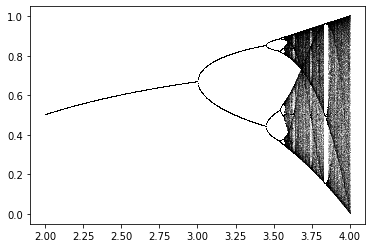

In [ ]:
n = 1000
x = 0.2

R = np.linspace(2,4,n)
X = x*np.ones(n)

YY = nested_logistic(X,R,5000)


for count in range(0,600):
    plt.plot(R,YY,',k',c='black',alpha=0.1)
    YY=logistic(YY,R)



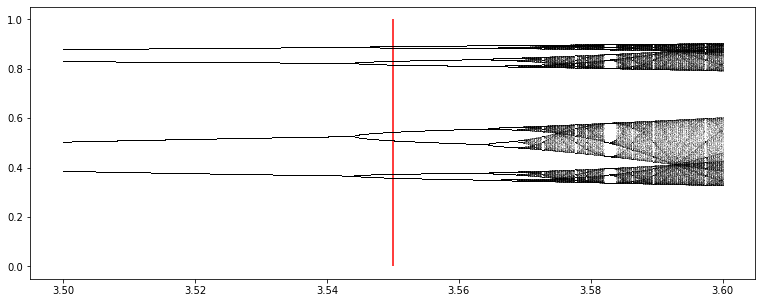

In [ ]:
#plots represent stable periods, lets zoom in
plt.figure(figsize=(13,5))


n = 1000
x = 0.2

R = np.linspace(3.5,3.6,n)
X = x*np.ones(n)

YY = nested_logistic(X,R,5000)


for count in range(0,600):
    plt.plot(R,YY,',k',c='black',alpha=0.1)
    YY=logistic(YY,R)

#this should be our period 8 configuration
plt.vlines(3.55, 0, 1, colors='r')

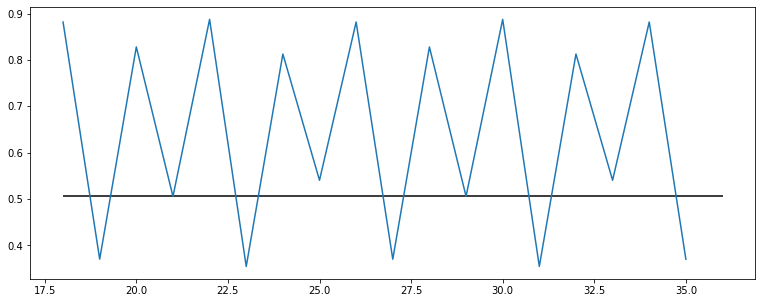

In [ ]:
plt.figure(figsize=(13,5))

n = 100
x = [0.1]

for i in range(1, n):
  x.append(logistic(x[i-1], 3.55))
  

plt.plot(np.arange(18, 36), x[18:36])
plt.hlines(x[21], 18, 36)

#as expected, r=3.55 gives us our period 8

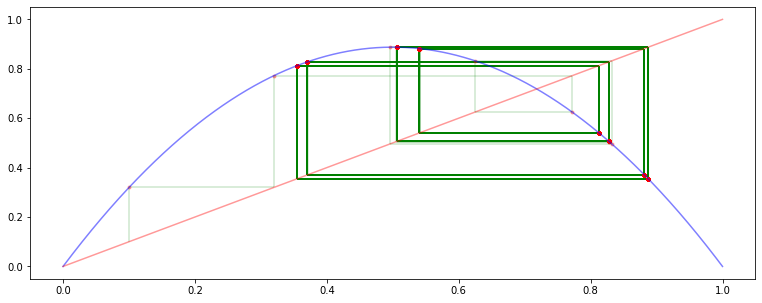

In [ ]:
plt.figure(figsize=(13,5))

r = 3.55

x = 0.1
Steps=1000

x_old = x

for t in range(0,Steps):
    x = logistic(x, r)
    plt.plot(x_old,x,".",c='r',alpha=0.3)
    Cobweb(x_old,x,'g',0.2)
    
    x_old = x
    
    
X=np.linspace(0,1,1000)
Y=logistic(X, r)
plt.plot(X,Y,c='b',alpha=0.5)
plt.plot(X,X,c='r',alpha=0.4)

## Question 2

Plot a subsection of the Mandelbrot set. That clearly illustrates the Fractal nature of the Set

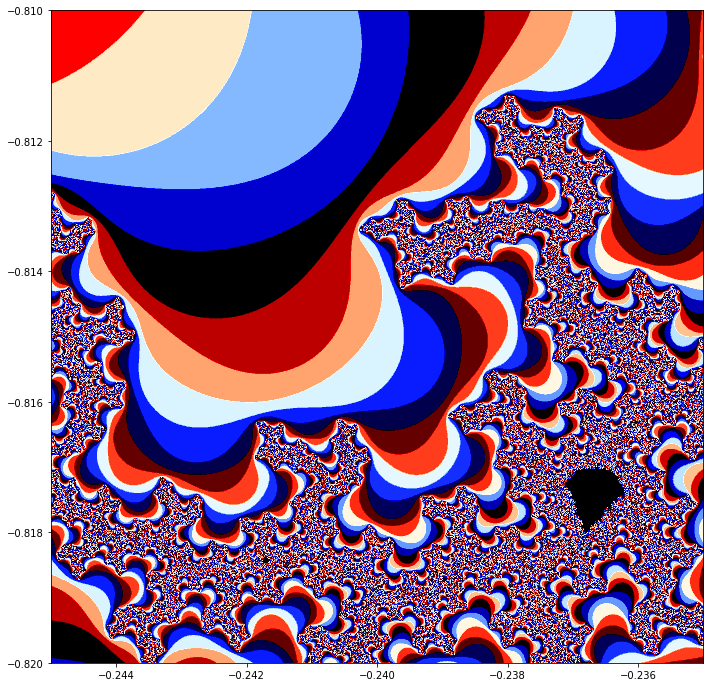

In [ ]:
with np.warnings.catch_warnings():
        np.warnings.simplefilter("ignore")
        ydown,yup=-.82,-.81
        xleft,xright=-.245,-.235
        n=3000
        
        X = np.linspace(xleft,xright,n)
        Y = np.linspace(ydown,yup,n)

        X,Y = np.meshgrid(X,Y)
        def Z(x,y):
            return x+1j*y

        C=Z(X,Y)

        Z = complex(0,0)
        
        FinalPic = np.zeros((n,n))
        
        for count in range(100):
            Z=Z**2 + C
            Points= (abs(Z)<2)
            
            FinalPic = FinalPic + Points*np.ones((n,n))

        pic = plt.figure()
        pic.set_size_inches((12,12))
        
        plt.imshow(FinalPic,cmap='flag',extent=[xleft,xright,ydown,yup])

## Question 3

Plot the Julia set for  $C=0.285+0.01i$

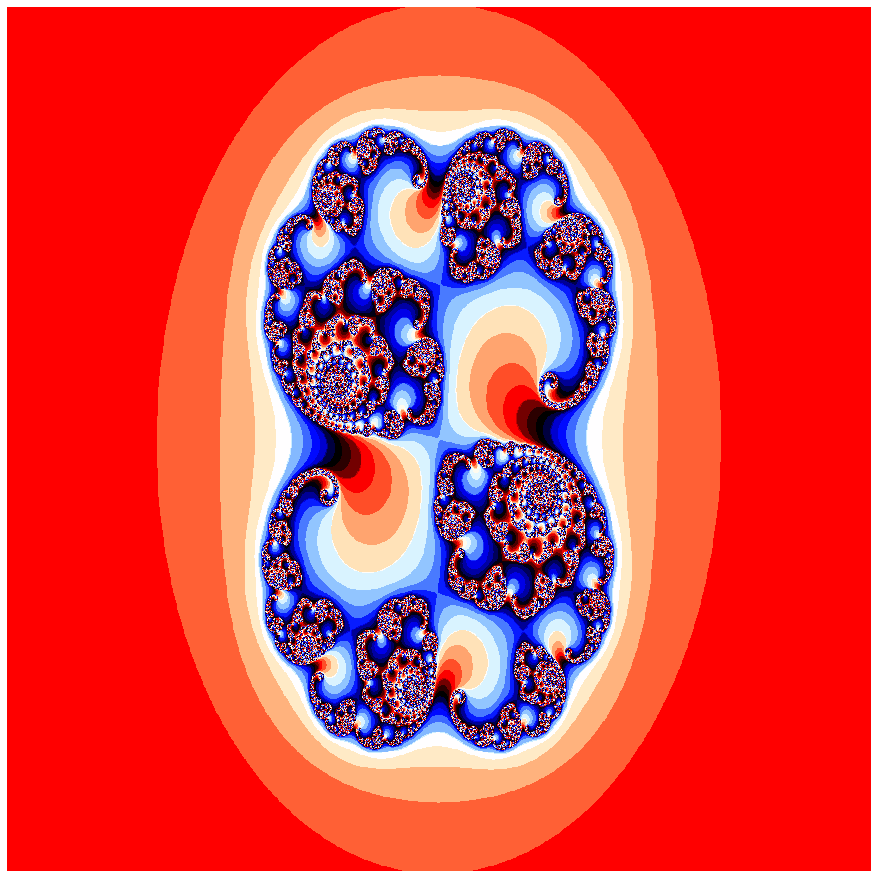

In [ ]:
C1= 0.285 + 0.01j
n=1000


ydown, yup = -1.5,1.5
xleft,xright =-2,2


X=np.linspace(xleft,xright,n)
Y=np.linspace(ydown, yup,n)

X, Y = np.meshgrid(X, Y)
def Z(x,y):
    return x + 1j * y
Z0 = np.full((n, n), C1)
Final =np.zeros((n,n))
with np.warnings.catch_warnings():
        np.warnings.simplefilter("ignore")
        Z = Z(X, Y)
        for count in range(205):
            Z=Z*Z + Z0
            Points = (abs(Z)<2)
            Final = Final +Points*np.ones((n,n))

pic = plt.figure()
pic.set_size_inches(12,12)
ax = pic.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
ax.set_xticks([])
ax.set_yticks([])
          
plt.imshow(Final,cmap = 'flag')
plt.show()